<img src = "https://images2.imgbox.com/a5/72/7ZbDUHlf_o.jpg" width="200">



# Turma #867 - Projeto Machine Learning I - Equipe 03
---


## Modelo Árvore de Decisão

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

np.random.seed(4)

In [2]:
df_dict = pd.read_csv("dados/HomeCredit_columns_description.csv", encoding='latin1')
df_dict = df_dict[df_dict['Table'] == 'application_{train|test}.csv']
df_dict = df_dict.drop_duplicates()
df_dict.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [3]:
df_credit_train = pd.read_csv('dados/application_train.csv')

In [4]:
df_values = pd.read_csv("dados/application_train.csv")
df_values = df_values.drop_duplicates()
df = df_values
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [5]:
# A base é um pouco desbalanceada, 
# existem menos pessoas inadimplentes

df.TARGET.value_counts()

0    226038
1     19970
Name: TARGET, dtype: int64

### Escolhendo as Features

In [6]:
#Verifico as colunas com nulos e as removo

df_null = pd.DataFrame(df.isna().sum())
df_null = df_null[df_null[0]==0]
columns_avalia = df_null.reset_index()['index'].to_list()
columns_avalia

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_

In [7]:
df = df[columns_avalia]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 0 to 246007
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   246008 non-null  int64  
 1   TARGET                       246008 non-null  int64  
 2   NAME_CONTRACT_TYPE           246008 non-null  object 
 3   CODE_GENDER                  246008 non-null  object 
 4   FLAG_OWN_CAR                 246008 non-null  object 
 5   FLAG_OWN_REALTY              246008 non-null  object 
 6   CNT_CHILDREN                 246008 non-null  int64  
 7   AMT_INCOME_TOTAL             246008 non-null  float64
 8   AMT_CREDIT                   246008 non-null  float64
 9   NAME_INCOME_TYPE             246008 non-null  object 
 10  NAME_EDUCATION_TYPE          246008 non-null  object 
 11  NAME_FAMILY_STATUS           246008 non-null  object 
 12  NAME_HOUSING_TYPE            246008 non-null  object 
 13 

### Separo algumas colunas categoricas das regressoras

In [9]:
df.FLAG_OWN_CAR.value_counts()

N    162355
Y     83653
Name: FLAG_OWN_CAR, dtype: int64

In [10]:
# Columns categorical

# NAME_CONTRACT_TYPE, 
# CODE_GENDER, 
# NAME_INCOME_TYPE, 
# NAME_EDUCATION_TYPE, 
# NAME_FAMILY_STATUS, 
# NAME_HOUSING_TYPE, 
# WEEKDAY_APPR_PROCESS_START,
# ORGANIZATION_TYPE,

In [11]:
df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='N',0,1)
df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='N',0,1)

In [12]:
df_corr = df[['TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']]

### Utilizo as 3 colunas mais correlacionadas com a target

In [13]:
df_corr

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,0,0,0,112500.0,700830.0,0.019689,-8676,-813,-4163.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,90000.0,375322.5,0.025164,-13583,-223,-3554.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,180000.0,544491.0,0.035792,-13993,-6202,-7971.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,270000.0,814041.0,0.046220,-22425,365243,-11805.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,144000.0,675000.0,0.026392,-18839,-2763,-5069.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,0,0,1,1,270000.0,1172470.5,0.035792,-15992,-4333,-10024.0,...,0,0,0,0,0,0,0,0,0,0
246004,0,0,1,0,180000.0,654498.0,0.003122,-23798,365243,-3734.0,...,0,0,0,0,0,0,0,0,0,0
246005,1,0,0,1,112500.0,270000.0,0.011657,-14793,-1982,-7629.0,...,0,0,0,0,0,0,0,0,0,0
246006,1,1,0,3,202500.0,204858.0,0.016612,-14418,-2840,-1900.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_corr = df_corr.corr()
df_corr['TARGET'] = df_corr['TARGET'].abs()
df_corr.sort_values(by='TARGET')

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
FLAG_CONT_MOBILE,0.000284,-0.004829,0.007666,-0.001662,-0.007251,0.023672,-0.012931,-0.014735,0.012105,-0.003714,...,0.000123,-0.057396,-0.068924,-0.012283,-0.032629,-0.010902,-0.048074,-0.002836,0.000974,-0.004818
FLAG_MOBIL,0.000599,-0.002809,-0.001341,0.001164,0.000332,0.001606,0.001490,-0.003449,0.000916,-0.000113,...,0.000006,0.000121,0.000110,0.000069,0.000203,0.000033,-0.022486,0.000049,0.000045,0.000034
FLAG_DOCUMENT_20,0.000758,0.007423,-0.026070,0.002520,0.000302,0.032827,0.000558,0.010069,-0.010067,0.009478,...,-0.000064,0.037903,0.038677,0.030821,0.082957,0.032928,0.075038,0.044044,1.000000,0.010236
FLAG_DOCUMENT_12,0.000848,0.003972,-0.001195,0.000335,0.002585,0.004302,-0.000454,0.000268,-0.001372,0.001883,...,1.000000,-0.000171,-0.000155,-0.000098,-0.000287,-0.000046,-0.000256,-0.000069,-0.000064,-0.000048
FLAG_DOCUMENT_10,0.001038,-0.000049,0.002323,-0.002016,-0.000153,-0.001946,0.004752,0.003093,-0.001606,0.000207,...,-0.000010,-0.000209,-0.000190,-0.000120,-0.000351,-0.000057,-0.000313,-0.000085,-0.000079,-0.000059
FLAG_DOCUMENT_5,0.001290,-0.014160,-0.012090,-0.016977,0.000865,-0.010593,0.015143,0.016585,-0.020208,-0.000957,...,-0.000353,-0.007423,-0.006737,-0.004247,-0.012107,-0.002013,-0.010353,-0.003007,-0.002792,-0.000142
LIVE_REGION_NOT_WORK_REGION,0.001755,0.045582,-0.017906,0.014468,0.053165,0.051302,0.082907,0.069531,-0.095478,0.028223,...,-0.000586,0.015645,0.014673,0.003188,0.004646,-0.000802,0.004994,0.001808,0.000858,-0.002277
FLAG_DOCUMENT_7,0.001955,0.001874,0.002818,-0.001034,0.004658,-0.002636,0.003459,0.001480,-0.001145,0.001405,...,-0.000039,-0.000829,-0.000752,-0.000474,-0.001389,-0.000225,-0.001239,-0.000336,-0.000312,-0.000235
FLAG_EMAIL,0.002106,0.032128,0.028769,0.024111,0.034824,0.017578,0.042181,0.086622,-0.062276,0.033867,...,-0.000699,-0.004110,0.001238,-0.004819,-0.012451,-0.001824,-0.008157,-0.003059,-0.003190,-0.001063
AMT_INCOME_TOTAL,0.002286,0.075840,0.002667,0.012578,1.000000,0.142800,0.068520,0.025419,-0.058849,0.025251,...,0.002585,0.020092,0.019517,0.009531,0.006480,0.001635,0.002815,0.002270,0.000302,-0.000856


### Colunas que iremos utilizar

As 3 colunas mais correlacionadas com a target:

- DAYS_BIRTH
- REGION_RATING_CLIENT_W_CITY
- REGION_RATING_CLIENT

### Utilizo as 2 colunas mais separadora no teste qui-quadrado

In [15]:
df = df_values

In [16]:
X = df[['NAME_CONTRACT_TYPE', 
'CODE_GENDER', 
'NAME_INCOME_TYPE', 
'NAME_EDUCATION_TYPE', 
'NAME_FAMILY_STATUS', 
'NAME_HOUSING_TYPE', 
'WEEKDAY_APPR_PROCESS_START',
'ORGANIZATION_TYPE']]

X = pd.get_dummies(X)
X

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246004,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
246005,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246006,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Carrega a função do Qui Quadrado

X = df[['NAME_CONTRACT_TYPE', 
'CODE_GENDER', 
'NAME_INCOME_TYPE', 
'NAME_EDUCATION_TYPE', 
'NAME_FAMILY_STATUS', 
'NAME_HOUSING_TYPE', 
'WEEKDAY_APPR_PROCESS_START',
'ORGANIZATION_TYPE']]

X = pd.get_dummies(X)

y = df[['TARGET']]

# Aplicando o teste Qui quadrado

chi_scores = chi2(X, # Todas as variáveis categóricas
                  y) # Variável resposta 

In [18]:
list_columns = list(X.columns)

chi_score = list(chi_scores[0])

p_value = list(chi_scores[1])

dict_output = {
    "Feature": list_columns,
    "Chi Score": chi_score,
    "P-Value": np.round(p_value, 3)
}

df_chi = pd.DataFrame(dict_output)

In [19]:
df_chi = df_chi[df_chi['P-Value'] <= 0].sort_values(by='Chi Score')
df_chi

,Feature,Chi Score,P-Value
88,ORGANIZATION_TYPE_Trade: type 7,15.478650,0.0
38,ORGANIZATION_TYPE_Agriculture,15.691196,0.0
11,NAME_INCOME_TYPE_Unemployed,16.833513,0.0
78,ORGANIZATION_TYPE_Security Ministries,17.379471,0.0
84,ORGANIZATION_TYPE_Trade: type 3,19.467410,0.0
75,ORGANIZATION_TYPE_Restaurant,20.056645,0.0
6,NAME_INCOME_TYPE_Commercial associate,20.231206,0.0
68,ORGANIZATION_TYPE_Military,22.533138,0.0
0,NAME_CONTRACT_TYPE_Cash loans,22.658970,0.0
39,ORGANIZATION_TYPE_Bank,24.157004,0.0


### Colunas selecionadas
- NAME_EDUCATION_TYPE
- CODE_GENDER

### Modelo
Preparando os dados

In [20]:
df = df_values[["NAME_EDUCATION_TYPE", "CODE_GENDER", 
                "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", 
                "REGION_RATING_CLIENT", "TARGET"]]

df.head()

,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,Incomplete higher,F,-8676,2,2,0
1,Secondary / secondary special,F,-13583,2,2,0
2,Secondary / secondary special,M,-13993,2,2,0
3,Secondary / secondary special,F,-22425,1,1,0
4,Secondary / secondary special,F,-18839,2,2,0


### Aplicando o Modelo

In [21]:
features = ["NAME_EDUCATION_TYPE", "CODE_GENDER", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT"]
var_expl = ["NAME_EDUCATION_TYPE", "CODE_GENDER"]
var_resp = ['TARGET']

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 4)

x_treino = df_treino[features].copy()
x_teste = df_teste[features].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

oe = OrdinalEncoder()
x_treino[var_expl] = oe.fit_transform(x_treino[var_expl])
x_teste[var_expl] = oe.transform(x_teste[var_expl])

print('treino:', x_treino.shape, y_treino.shape)
print('teste:', x_teste.shape, y_teste.shape)

modelo = DecisionTreeClassifier(class_weight={0: 1, 1: 9}, max_depth=5, min_samples_split =5000)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)[:, 1]
y_pred = modelo.predict(x_teste)

treino: (196806, 5) (196806, 1)
teste: (49202, 5) (49202, 1)


### Resultados

In [22]:
# cálculo da acurácia

print("Acurácia",accuracy_score(y_teste, y_pred))
print("-------------")
print(classification_report(y_teste, y_pred))
print("------")
print("Area curva ROC:",roc_auc_score(y_teste, y_teste_pred))

Acurácia 0.6581643022641356
-------------
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     45189
           1       0.12      0.51      0.20      4013

    accuracy                           0.66     49202
   macro avg       0.53      0.59      0.49     49202
weighted avg       0.87      0.66      0.74     49202

------
Area curva ROC: 0.6275787827293929


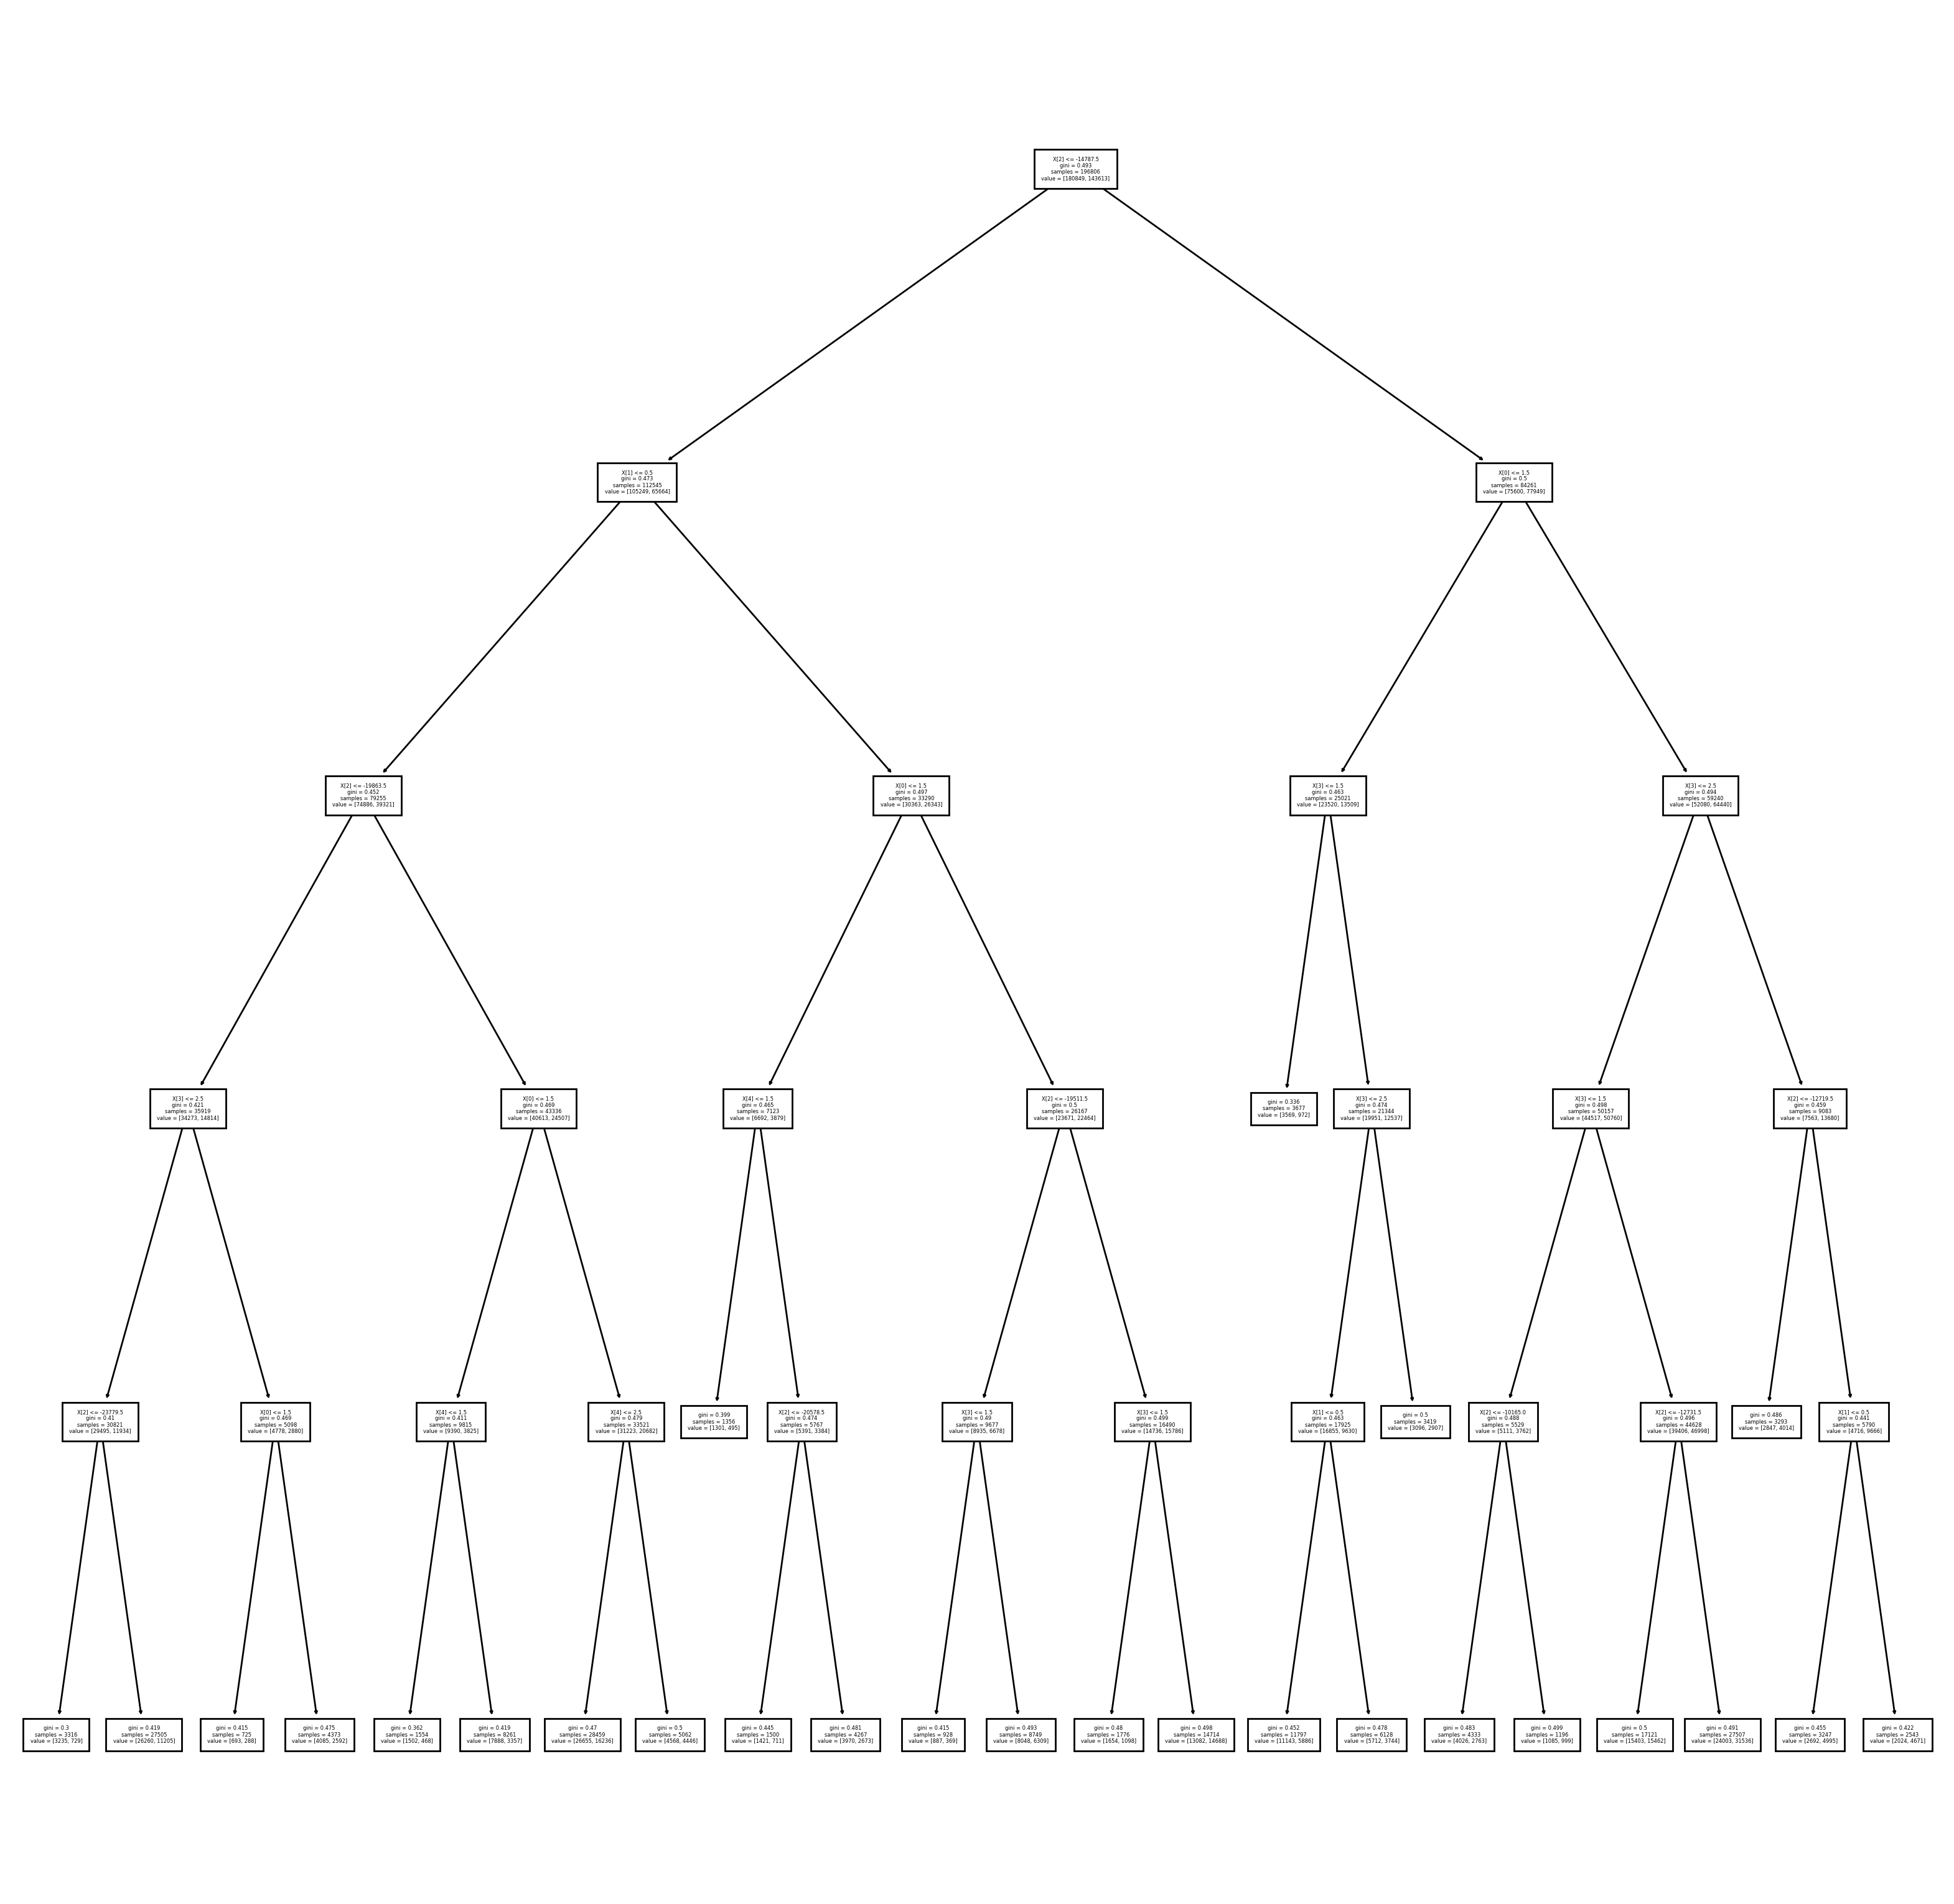

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (20, 20), dpi = 200)
plot_tree(modelo, fontsize = 3, ax = ax)
plt.show()

---